In [177]:
# Imports
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read and visualize data
train_csv_path = './data/train.csv'
train = pd.read_csv(train_csv_path)
print 'Training set size:', len(train)
train.head()

Training set size: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

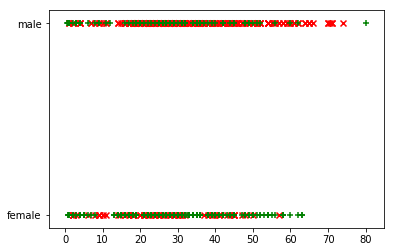

In [292]:
# Visualize
fig, ax = plt.subplots()
# ax.plot(train['Age'], train['Survived'], 'x')
dead = train.loc[train['Survived'] == 0]
alive = train.loc[train['Survived'] == 1]
ax.scatter(dead['Age'], dead['Sex'], marker='x', color='r')
ax.scatter(alive['Age'], alive['Sex'], marker='+', color='g')

In [255]:
def normalize(X):
    mu = X.mean()
    sigma = X.std()
    return (X - mu) / sigma, mu, sigma

def denormalize(X, mu, sigma):
    return (X * sigma) + mu


,Intercept,Age,Fare,Parch
0,NaN,22.0,7.2500,0.0
1,NaN,38.0,71.2833,0.0
2,NaN,26.0,7.9250,0.0
3,NaN,35.0,53.1000,0.0
4,NaN,35.0,8.0500,0.0


In [256]:
X = train[['Age', 'Fare', 'Parch']]
X, mu, sigma = normalize(X)
X.insert(0, 'Intercept', 0)
X= X.fillna(0)
X.head()

,Intercept,Age,Fare,Parch
0,0,-0.530005,-0.502163,-0.473408
1,0,0.571430,0.786404,-0.473408
2,0,-0.254646,-0.488580,-0.473408
3,0,0.364911,0.420494,-0.473408
4,0,0.364911,-0.486064,-0.473408


In [257]:
Y = train['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [258]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
sigmoid(np.array([-100, 0 ,100]))

array([  3.72007598e-44,   5.00000000e-01,   1.00000000e+00])

In [259]:
def linear_reg_cost(X, Y, theta):
    # print X.shape, Y.shape, theta.shape
    m = len(X)
    n = len(X.columns)
    assert len(Y) == m
    assert len(theta) == n
    H = sigmoid(np.dot(X, theta)).clip(0.0000001, 0.9999999)
    return -1 * (Y.mul(np.log(H)) + (1-Y).mul(np.log(1 - H))).sum() / m

init_theta = pd.Series([1, -1, 1, 1])
cost = linear_reg_cost(X, Y, init_theta)
cost


0.79235778009044799

In [260]:
def linear_reg_gradients(X, Y, theta):
    m = len(X)
    n = len(X.columns)
    assert len(Y) == m
    assert len(theta) == n
    H = sigmoid(np.dot(X, theta))
    return pd.Series(np.transpose(X.values).dot(H-Y))
gradient = linear_reg_gradients(X, Y, init_theta)
gradient

0      0.000000
1    -98.838084
2      4.424621
3    141.440243
dtype: float64

In [261]:
def apply_gradient_descent_once(X, Y, theta, alpha):
    m = len(X)
    n = len(X.columns)
    assert len(Y) == m
    assert len(theta) == n
    return theta - (alpha * linear_reg_gradients(X, Y, theta))
alpha = 0.3
new_theta = apply_gradient_descent_once(X, Y, init_theta, alpha)
new_theta

0     1.000000
1    28.651425
2    -0.327386
3   -41.432073
dtype: float64

In [262]:
def apply_gradient_descent(X, Y, theta, alpha, num_iterations):
    m = len(X)
    n = len(X.columns)
    assert len(Y) == m
    assert len(theta) == n
    thetas = np.zeros(shape=(num_iterations, n))
    curr_theta = theta
    for i in range(num_iterations):
        curr_theta = thetas[i] = apply_gradient_descent_once(X, Y, curr_theta, alpha)
    return thetas


195    0.643465
196    0.643464
197    0.643463
198    0.643463
199    0.643462
dtype: float64

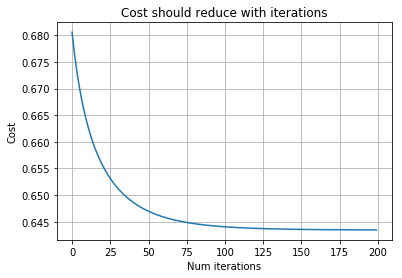

In [269]:
num_iterations = 200
init_theta = pd.Series([0, 0.1, 0.1, 0.1])
alpha = 0.0003
thetas = apply_gradient_descent(X, Y, init_theta, alpha, num_iterations)
costs = pd.DataFrame(thetas).apply(lambda t: linear_reg_cost(X, Y, t), axis=1)
fig, ax = plt.subplots()
ax.plot(costs)
ax.set(xlabel='Num iterations', ylabel='Cost', title='Cost should reduce with iterations')
ax.grid()
costs.tail()

In [274]:
selected_theta = thetas[199]
selected_theta

array([ 0.        , -0.25778545,  0.95884573, -0.03556842])

In [275]:
def predict(X, theta):
    m = len(X)
    n = len(X.columns)
    assert len(theta) == n
    return 1*pd.Series(sigmoid(np.dot(X, theta)) >= 0.5)
predictions = predict(X, selected_theta)
predictions.tail()

886    0
887    1
888    0
889    1
890    0
dtype: int64

In [276]:
def calc_error(predictions, Y):
    return (Y - predictions).abs().mean() * 100
calc_error(predictions, Y)

30.751964085297416